In [17]:
#q1.2
movies = 0
comp551 = 0
playing = 0
studying = 0
for x in range(0, 100):
    rand = random.uniform(0,1)
    if rand < 0.2:
        movies+=1 
    elif rand < 0.6:
        comp551+=1
    elif rand < 0.7:
        playing+=1
    else:
        studying+=1
print("movies ", movies/100.0)
print("comp-551 " , comp551/100.0)
print("playing", playing/100.0)
print("studying", studying/100.0)

('movies ', 0.21)
('comp-551 ', 0.38)
('playing', 0.11)
('studying', 0.3)


In [18]:
movies = 0
comp551 = 0
playing = 0
studying = 0
for x in range(0, 1000):
    rand = random.uniform(0,1)
    if rand < 0.2:
        movies+=1 
    elif rand < 0.6:
        comp551+=1
    elif rand < 0.7:
        playing+=1
    else:
        studying+=1
print("movies ", movies/1000.0)
print("comp-551 " , comp551/1000.0)
print("playing", playing/1000.0)
print("studying", studying/1000.0)

('movies ', 0.217)
('comp-551 ', 0.4)
('playing', 0.092)
('studying', 0.291)


In [3]:
train_data1_in = pd.read_csv('Dataset_1_train.csv', header=None, usecols=[0, 1])
test_data1_in = pd.read_csv('Dataset_1_test.csv', header=None, usecols=[0, 1])
validation_data1_in = pd.read_csv('Dataset_1_valid.csv', header=None, usecols=[0, 1])


def polyfit(x, y, degree, lmb):

    """Returns a coefficient matrix W by fitting the given a set of
    x and y inputs, as well as the degree of the polynomial fit"""

    # Start by constructing the array of x polynomials
    current_degree = 0
    X = np.ones(shape=(len(x), degree + 1))

    # Calculate the values in the X array, adding one column of values at a time to the power n
    for i in reversed(range(degree + 1)):
        X[:, i] = np.array([exponentiator(xi, current_degree) for xi in x])
        current_degree += 1

    # Convert X to a numpy matrix for easy multiplication
    X = np.matrix(X)

    # For some reason y becomse a 1x50 matrix instead of the intended 50x1, so this is just to fix that
    Y = np.matrix(y)
    Y = np.transpose(Y)
    
    # If you are using L2 regularization (i.e lambda > 0) then construct the regularization matrix to be added.
    # Note that if lambda is zero then an empty matrix is added which has no effect on the result
    I = np.identity(degree+1)

    # Finally calculate the coefficient matrix
    W = np.linalg.inv((np.matrix.transpose(X)*X) + lmb*I)*(np.matrix.transpose(X)*Y)

    return W

def predict_value(W, x):

    y_pred = 0.0
    for i in range(W.size):
        Wi = W[i, 0]
        xi = exponentiator(x, W.size - i - 1)
        y_pred += Wi*xi

    return y_pred


def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

polymodel = polyfit(train_data1_in[0], train_data1_in[1], 20)
y_pred_t = []
y_pred_v = []

for i in range(train_data1_in[0].size):
    y_pred_t.append(predict_value(polymodel, train_data1_in[0][i]))

# Predict the value of y in the validation set with out model
for i in range(validation_data1_in[0].size):
    y_pred_v.append(predict_value(polymodel, validation_data1_in[0][i]))

# Calculate the mse for both the training and validation sets
t_mean_square_error = mse(train_data1_in[1], y_pred_t)
v_mean_square_error = mse(validation_data1_in[1], y_pred_v)

print("Training MSE: ", t_mean_square_error)

# Unfortunately I had to resort to plotting points instead of a line
# for the model, as for some reason the line graphs display in a very hectic manner. (BUG IN MATPLOT NOT MY FAULT)

plt.title("Training Data Visualization")
plt.plot(train_data1_in[0], train_data1_in[1], 'o',  train_data1_in[0], y_pred_t, 'ro')
plt.legend(['Data Points', 'Model predictions'])
plt.axis([-1,1,-15,30])
plt.show()

NameError: name 'pd' is not defined

In [1]:
train_data1_in = pd.read_csv('Dataset_1_train.csv', header=None, usecols=[0, 1])
test_data1_in = pd.read_csv('Dataset_1_test.csv', header=None, usecols=[0, 1])
validation_data1_in = pd.read_csv('Dataset_1_valid.csv', header=None, usecols=[0, 1])


def polyfit(x, y, degree, lmb):

    """Returns a coefficient matrix W by fitting the given a set of
    x and y inputs, as well as the degree of the polynomial fit"""

    # Start by constructing the array of x polynomials
    current_degree = 0
    X = np.ones(shape=(len(x), degree + 1))

    # Calculate the values in the X array, adding one column of values at a time to the power n
    for i in reversed(range(degree + 1)):
        X[:, i] = np.array([exponentiator(xi, current_degree) for xi in x])
        current_degree += 1

    # Convert X to a numpy matrix for easy multiplication
    X = np.matrix(X)

    # For some reason y becomse a 1x50 matrix instead of the intended 50x1, so this is just to fix that
    Y = np.matrix(y)
    Y = np.transpose(Y)
    
    # If you are using L2 regularization (i.e lambda > 0) then construct the regularization matrix to be added.
    # Note that if lambda is zero then an empty matrix is added which has no effect on the result
    I = np.identity(degree+1)

    # Finally calculate the coefficient matrix
    W = np.linalg.inv((np.matrix.transpose(X)*X) + lmb*I)*(np.matrix.transpose(X)*Y)
    print(W)
    return W

def polypredict_value(w, x):

    y_pred = 0.0
    for i in range(w.size):
        Wi = w[i, 0]
        xi = exponentiator(x, w.size - i - 1)
        y_pred += Wi*xi

    return y_pred


def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

polymodel = polyfit(train_data1_in[0], train_data1_in[1], 20, 0)
y_pred_t = []
y_pred_v = []

for i in range(train_data1_in[0].size):
    y_pred_t.append(polypredict_value(polymodel, train_data1_in[0][i]))

for i in range(validation_data1_in[0].size):
    y_pred_v.append(polypredict_value(polymodel, validation_data1_in[0][i]))

t_mean_square_error = mse(train_data1_in[1], y_pred_t)
v_mean_square_error = mse(validation_data1_in[1], y_pred_v)

print("Training MSE: ", t_mean_square_error)


plt.title("Training Data Visualization")
plt.plot(train_data1_in[0], train_data1_in[1], 'o',  train_data1_in[0], y_pred_t, 'ro')
plt.legend(['Data Points', 'Model predictions'])
plt.axis([-1,1,-15,30])
plt.show()

print("Validation MSE: ", v_mean_square_error)

plt.title("Validation Data Visualization")
plt.plot(validation_data1_in[0], validation_data1_in[1], 'o',  validation_data1_in[0], y_pred_v, 'ro')
plt.legend(['Data Points', 'Model predictions'])
plt.show()

NameError: name 'pd' is not defined

as you can see in the training and validation visualizations the model fits perfectly 

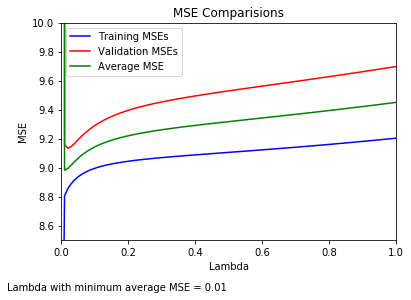

In [59]:
train_MSEs = []
validation_MSEs = []
average_MSEs = []
lambda_vals = np.linspace(0, 1, 101)

for i in lambda_vals:
    polymodel = polyfit(train_data1_in[0], train_data1_in[1], 20, i)
    y_pred_t = []
    y_pred_v = []
    # Predict the value of y in the training set with our model
    for j in range(train_data1_in[0].size):
        y_pred_t.append(polypredict_value(polymodel, train_data1_in[0][j]))

    # Predict the value of y in the validation set with out model
    for k in range(validation_data1_in[0].size):
        y_pred_v.append(polypredict_value(polymodel, validation_data1_in[0][k]))

    train_MSEs.append(mse(train_data1_in[1], y_pred_t))
    validation_MSEs.append(mse(validation_data1_in[1], y_pred_v))
    average_MSEs.append((mse(train_data1_in[1], y_pred_t)+mse(validation_data1_in[1], y_pred_v))/2)
    
s = "Lambda with minimum average MSE = " + str(lambda_vals[average_MSEs.index(min(average_MSEs))])
    
plt.title("MSE Comparisions")
plt.plot(lambda_vals, train_MSEs, '-b', lambda_vals, validation_MSEs, '-r', lambda_vals, average_MSEs, '-g')
plt.legend(['Training MSEs', 'Validation MSEs', 'Average MSE'])
plt.axis([0,1,8.5,10])
plt.figtext( 0, -0.05, s)
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.show()

In [2]:
train_data2_in = pd.read_csv('Dataset_2_train.csv', header=None, usecols=[0, 1])
test_data2_in = pd.read_csv('Dataset_2_test.csv', header=None, usecols=[0, 1])
validation_data2_in = pd.read_csv('Dataset_2_valid.csv', header=None, usecols=[0, 1])

def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

def predict_y(data_point, coeffs):
    for i in range(len(data_point)-1) :
        y = coeffs[0] + coeffs[1]*data_point[i]
    return y

def SGD(data, step_size, W):
    for index, data_point in data.iterrows():
        y = predict_y(data_point, W)
        error = y - data_point[1]
        W[0] -= error*step_size
        W[1] -= error*step_size*data_point[0]
    
    return coeffs


step_size = 0.000001
coeffs = [0.4, 0.8]
train_MSEs = []
validation_MSEs = []
epochs = [x for x in range(1, 10000)]


for x in epochs:
    y_pred_t = []
    y_pred_v = []
    dic[x] = coeffs
    coeffs = SGD(train_data2_in, step_size, coeffs)
    for index, data_point_t in train_data2_in.iterrows():
        y_pred_t.append(predict_y(data_point_t, coeffs))

    for index, data_point_v in validation_data2_in.iterrows():
        y_pred_v.append(predict_y(data_point_v, coeffs))

    validation_MSEs.append(mse(validation_data2_in[1], y_pred_v))
    train_MSEs.append(mse(train_data2_in[1], y_pred_t))
plt.title("Learning Curve")
plt.plot(epochs, train_MSEs, '-b', epochs, validation_MSEs, '-g')
plt.legend(['Training MSE', 'Validation MSE'])
plt.show()

NameError: name 'pd' is not defined

# Q 3.2

In [1]:
step_sizes = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

epochs = [x for x in range(1, 1000)]
for step_size in step_sizes:
    coeffs = [0.0, 0.0]
    validation_MSEs = []
    for x in epochs:
        coeffs = Online_SGDfit(train_data2_in, step_size, coeffs)
        y_pred_v = []
        for index, data_point_v in validation_data2_in.iterrows():
            y_pred_v.append(SGD_val(data_point_v, coeffs))
        validation_MSEs.append(mse(validation_data2_in[1], y_pred_v))
    thisdict[step_size] = sum(validation_MSEs) / float(len(validation_MSEs))       
print(min(thisdict, key=thisdict.get))
print('step size validation MSE')
for step_size, validation_MSEs in thisdict.items():
    print('{} {}'.format(step_size, validation_MSEs))

NameError: name 'Online_SGDfit' is not defined

In [216]:
test_data2_in = pd.read_csv('Dataset_2_test.csv', header=None, usecols=[0, 1])

def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

def predict_y(data_point, coeffs):
    for i in range(len(data_point)-1) :
        y = coeffs[0] + coeffs[1]*data_point[i]
    return y

def SGD(data, step_size, W):
    for index, data_point in data.iterrows():
        y = predict_y(data_point, W)
        error = y - data_point[1]
        W[0] -= error*step_size
        W[1] -= error*step_size*data_point[0]
    
    return coeffs


step_size = 0.01
coeffs = [0.4, 0.8]
test_MSEs = []
epochs = [x for x in range(1, 1000)]
for x in epochs:
    y_pred_t = []
    coeffs = SGD(train_data2_in, step_size, coeffs)
    for index, data_point_t in test_data2_in.iterrows():
        y_pred_t.append(predict_y(data_point_t, coeffs))
    test_MSEs.append(mse(test_data2_in[1], y_pred_t))
print(np.mean(test_MSEs))
plt.title("testing Curve")
plt.plot(epochs, test_MSEs, '-b')
plt.legend(['Test MSE'])
plt.show()


0.06934454684267356


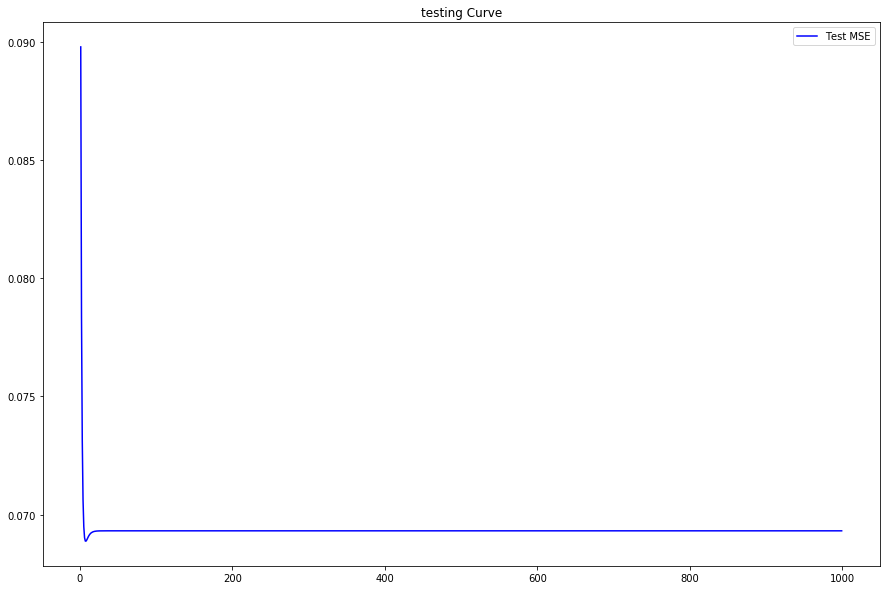

In [217]:
plt.title("testing Curve")
plt.plot(epochs, test_MSEs, '-b')
plt.legend(['Test MSE'])
plt.show()


In [202]:
train_data2_in = pd.read_csv('Dataset_2_train.csv', header=None, usecols=[0, 1])
test_data2_in = pd.read_csv('Dataset_2_test.csv', header=None, usecols=[0, 1])
validation_data2_in = pd.read_csv('Dataset_2_valid.csv', header=None, usecols=[0, 1])

def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

def predict_y(data_point, coeffs):
    for i in range(len(data_point)-1) :
        y = coeffs[0] + coeffs[1]*data_point[i]
    return y

def SGD(data, step_size, W):
    for index, data_point in data.iterrows():
        y = predict_y(data_point, W)
        error = y - data_point[1]
        W[0] -= error*step_size
        W[1] -= error*step_size*data_point[0]
    
    return coeffs


step_size = 0.000001
coeffs = [0.4, 0.8]
train_MSEs = []
validation_MSEs = []
epochs = [x for x in range(1, 100)]


for x in epochs:
    y_pred_t = []
    y_pred_v = []
    coeffs = SGD(train_data2_in, step_size, coeffs)
    for index, data_point_t in train_data2_in.iterrows():
        y_pred_t.append(predict_y(data_point_t, coeffs))
    dic[x] = y_pred_t
    for index, data_point_v in validation_data2_in.iterrows():
        y_pred_v.append(predict_y(data_point_v, coeffs))

    validation_MSEs.append(mse(validation_data2_in[1], y_pred_v))
    train_MSEs.append(mse(train_data2_in[1], y_pred_t))


('Epoch number: ', 691)


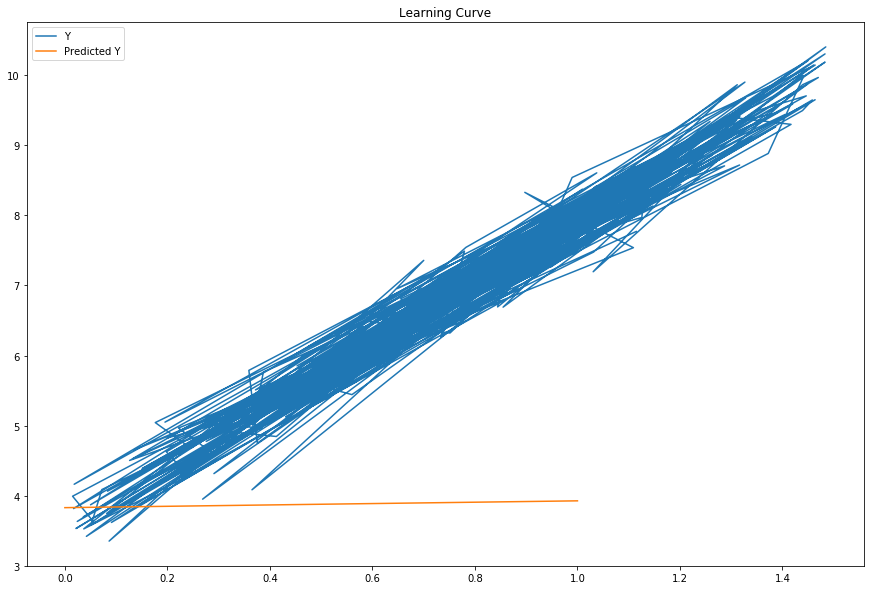

('Epoch number: ', 41)


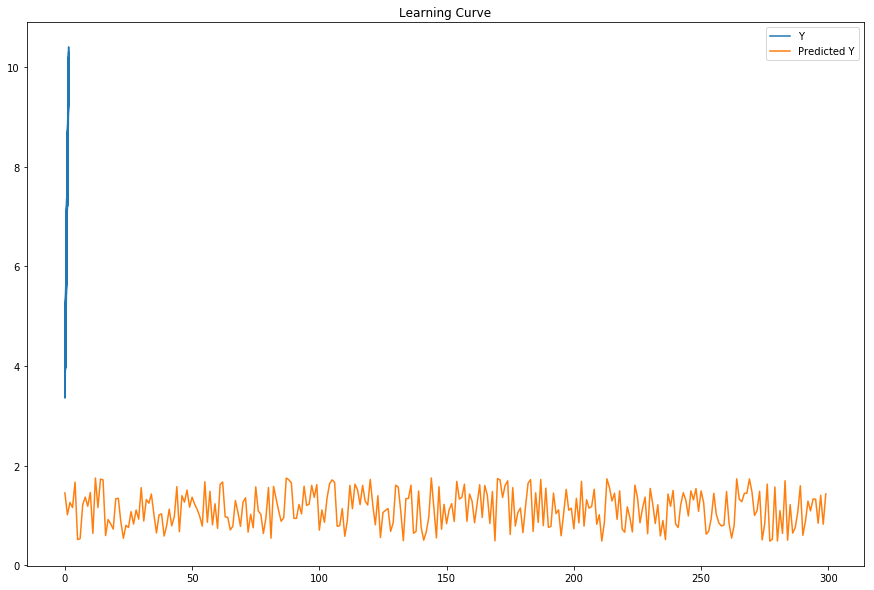

('Epoch number: ', 353)


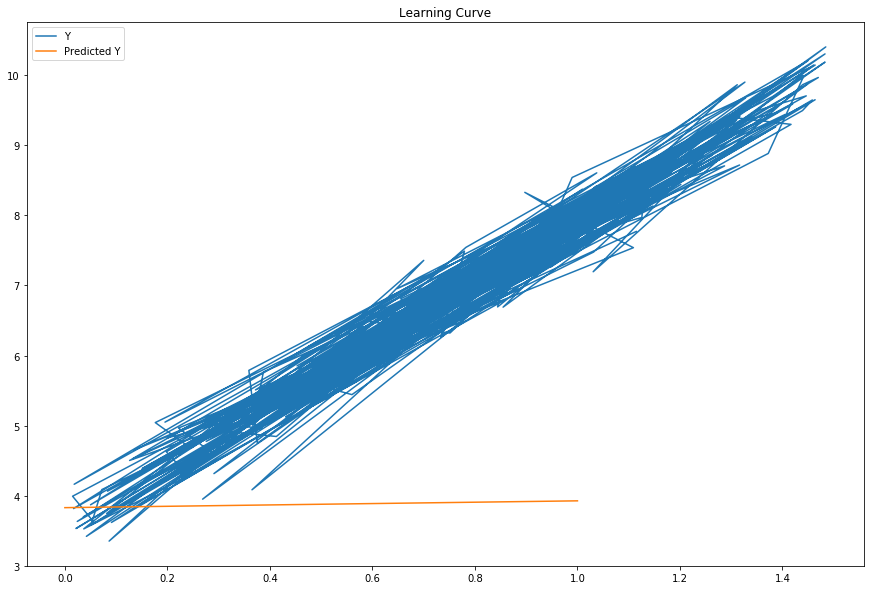

('Epoch number: ', 213)


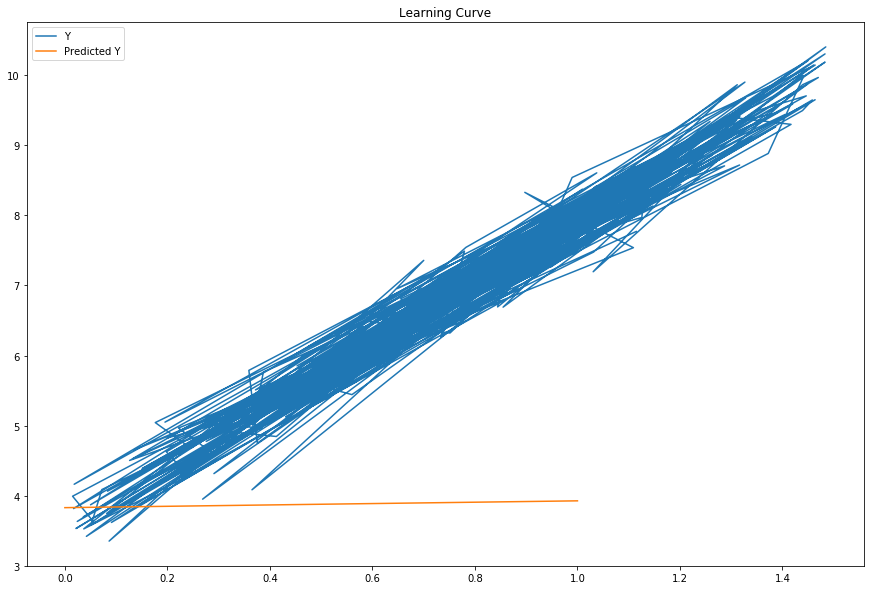

('Epoch number: ', 423)


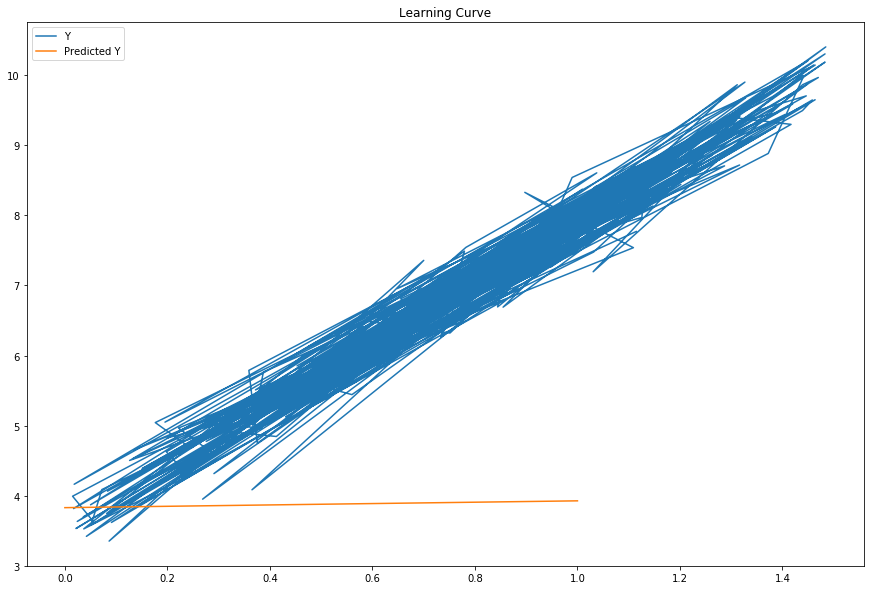

In [286]:
for i in range(5):
    random_epoch = random.randint(0, 1000)
    
    print("Epoch number: ", random_epoch)
    plt.title("Learning Curve")
    plt.plot(train_data2_in[0], train_data2_in[1], dic[random_epoch])
    #plt.plot(train_data2_in[0], train_data2_in[1], 'b')
    #plt.plot(pred_dict[random_epoch], color="red")
    plt.legend(['Y', 'Predicted Y'])
    plt.show()